In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter("ignore")

In [13]:
df = pd.read_csv('Titanic-Dataset.csv')

In [15]:
print("Initial Info:\n")
print(df.info())
print("\nMissing Values:\n")
print(df.isnull().sum())

Initial Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          6

In [17]:
print("\nSummary Statistics:\n")
print(df.describe(include='all'))


Summary Statistics:

        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parc

In [19]:
# Handling missing values
# Age: use median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [21]:
# Embarked: use mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [23]:
# Cabin: drop (too many missing)
df.drop(columns=['Cabin'], inplace=True)

In [25]:
# Drop PassengerId, Name, Ticket (not useful for ML model directly)
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [27]:
# Encoding categorical features
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

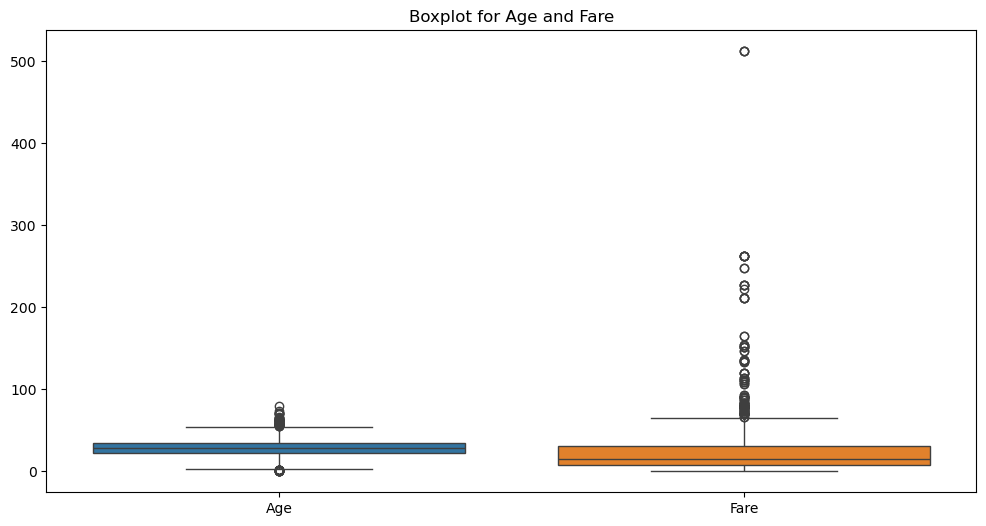

In [29]:
# Check for outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Boxplot for Age and Fare')
plt.show()

## This boxplot visualizes the distribution of two variables, Age and Fare, showing their central tendencies, variability, and outliers.
# Age:
### The median age is around 30 years.Most ages are clustered between approximately 20 and 40 years.The range extends from very young (under 10) to older individuals, with some outliers at the lower end, indicating very young ages.Outliers are minimal, suggesting the data is fairly consistent in age distribution.

# Fare:
### The median fare is lower, around 15-20 units.The data is more spread out with some very high fares, evident from the long upper whisker and scatter of outliers above 100.Outliers with significantly higher fares are present, indicating a subset paid much more than the typical fare.Overall, the plot shows that most individuals are within a common age range and fare, but there are some outliers with very high fares, possibly luxury tickets or special services, and some very young individuals.

In [31]:
# Remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

In [33]:
df = remove_outliers_iqr(df, 'Fare')
df = remove_outliers_iqr(df, 'Age')

In [35]:
# Normalize numerical features
scaler = StandardScaler()
num_cols = ['Age', 'Fare']
df[num_cols] = scaler.fit_transform(df[num_cols])


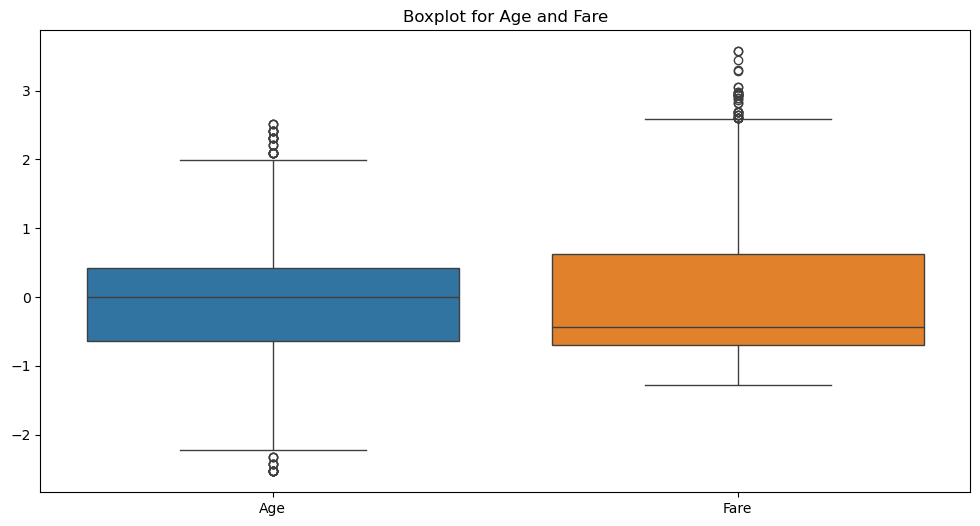

In [39]:
# BoxPlot After Removing Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Boxplot for Age and Fare')
plt.show()

# This updated boxplot shows the distributions of Age and Fare after removing outliers using the IQR method.
## Age:
### The spread of ages is now more condensed.The median remains around 30, with fewer extreme values at the lower and upper ends.The outliers (previously visible as dots) are no longer present, indicating successful outlier removal.The interquartile range (IQR) is smaller, suggesting a more typical age range.

## Fare:
### The fare distribution is also more concentrated.The median fare remains around the initial value, but the outliers with very high fares (above 100) have been removed.The spread is narrower, reflecting a more typical fare range for passengers.The removal of outliers gives a clearer view of the central distribution without the skew caused by extreme values.

### Overall, the boxplots now depict a cleaner dataset with fewer outliers, allowing for more accurate analysis of the core data trends.



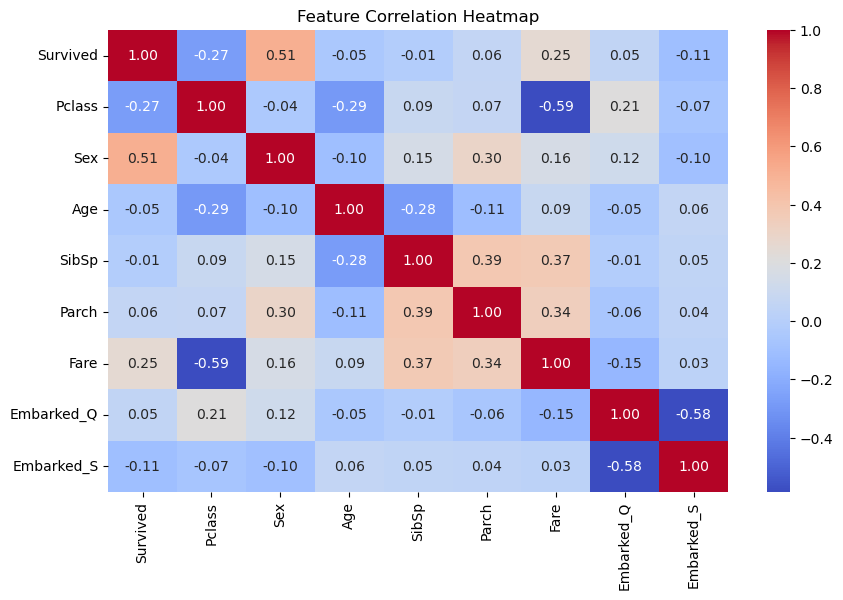

In [41]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# Strongest positive correlation:

## Embarked_Q and Embarked_S (r ≈ 0.58): These two variables are moderately positively correlated, suggesting that they tend to increase together.

## The correlation between Pclass and Sex (–0.27) is also notable, indicating a moderate negative relationship.

# Strongest negative correlation:

## Fare and Embarked_S (–0.58): Suggests that fares tend to be lower for passengers embarked from South (S).

## Fare and Pclass: There’s a slight negative correlation, implying higher classes tend to pay more.

# Other notable correlations:

## Sex and Age (0.15): Slight positive correlation, possibly indicating some relationship between age and sex distribution.

## Age and Pclass (–0.10): Slight negative, indicating that higher classes may include slightly younger passengers.
## Survived and Pclass (–0.27): Indicates that lower classes had a lower survival rate, or vice versa.

# Overall:
## The features Fare and Pclass have a meaningful negative correlation, consistent with the fact that higher class passengers tend to pay more.

## The embarked locations (Q and S) are positively correlated, which might reflect similar passenger distributions.

## The correlation matrix helps to understand relationships, reduce multicollinearity in modeling, and identify features that could be most predictive for analysis or modeling.



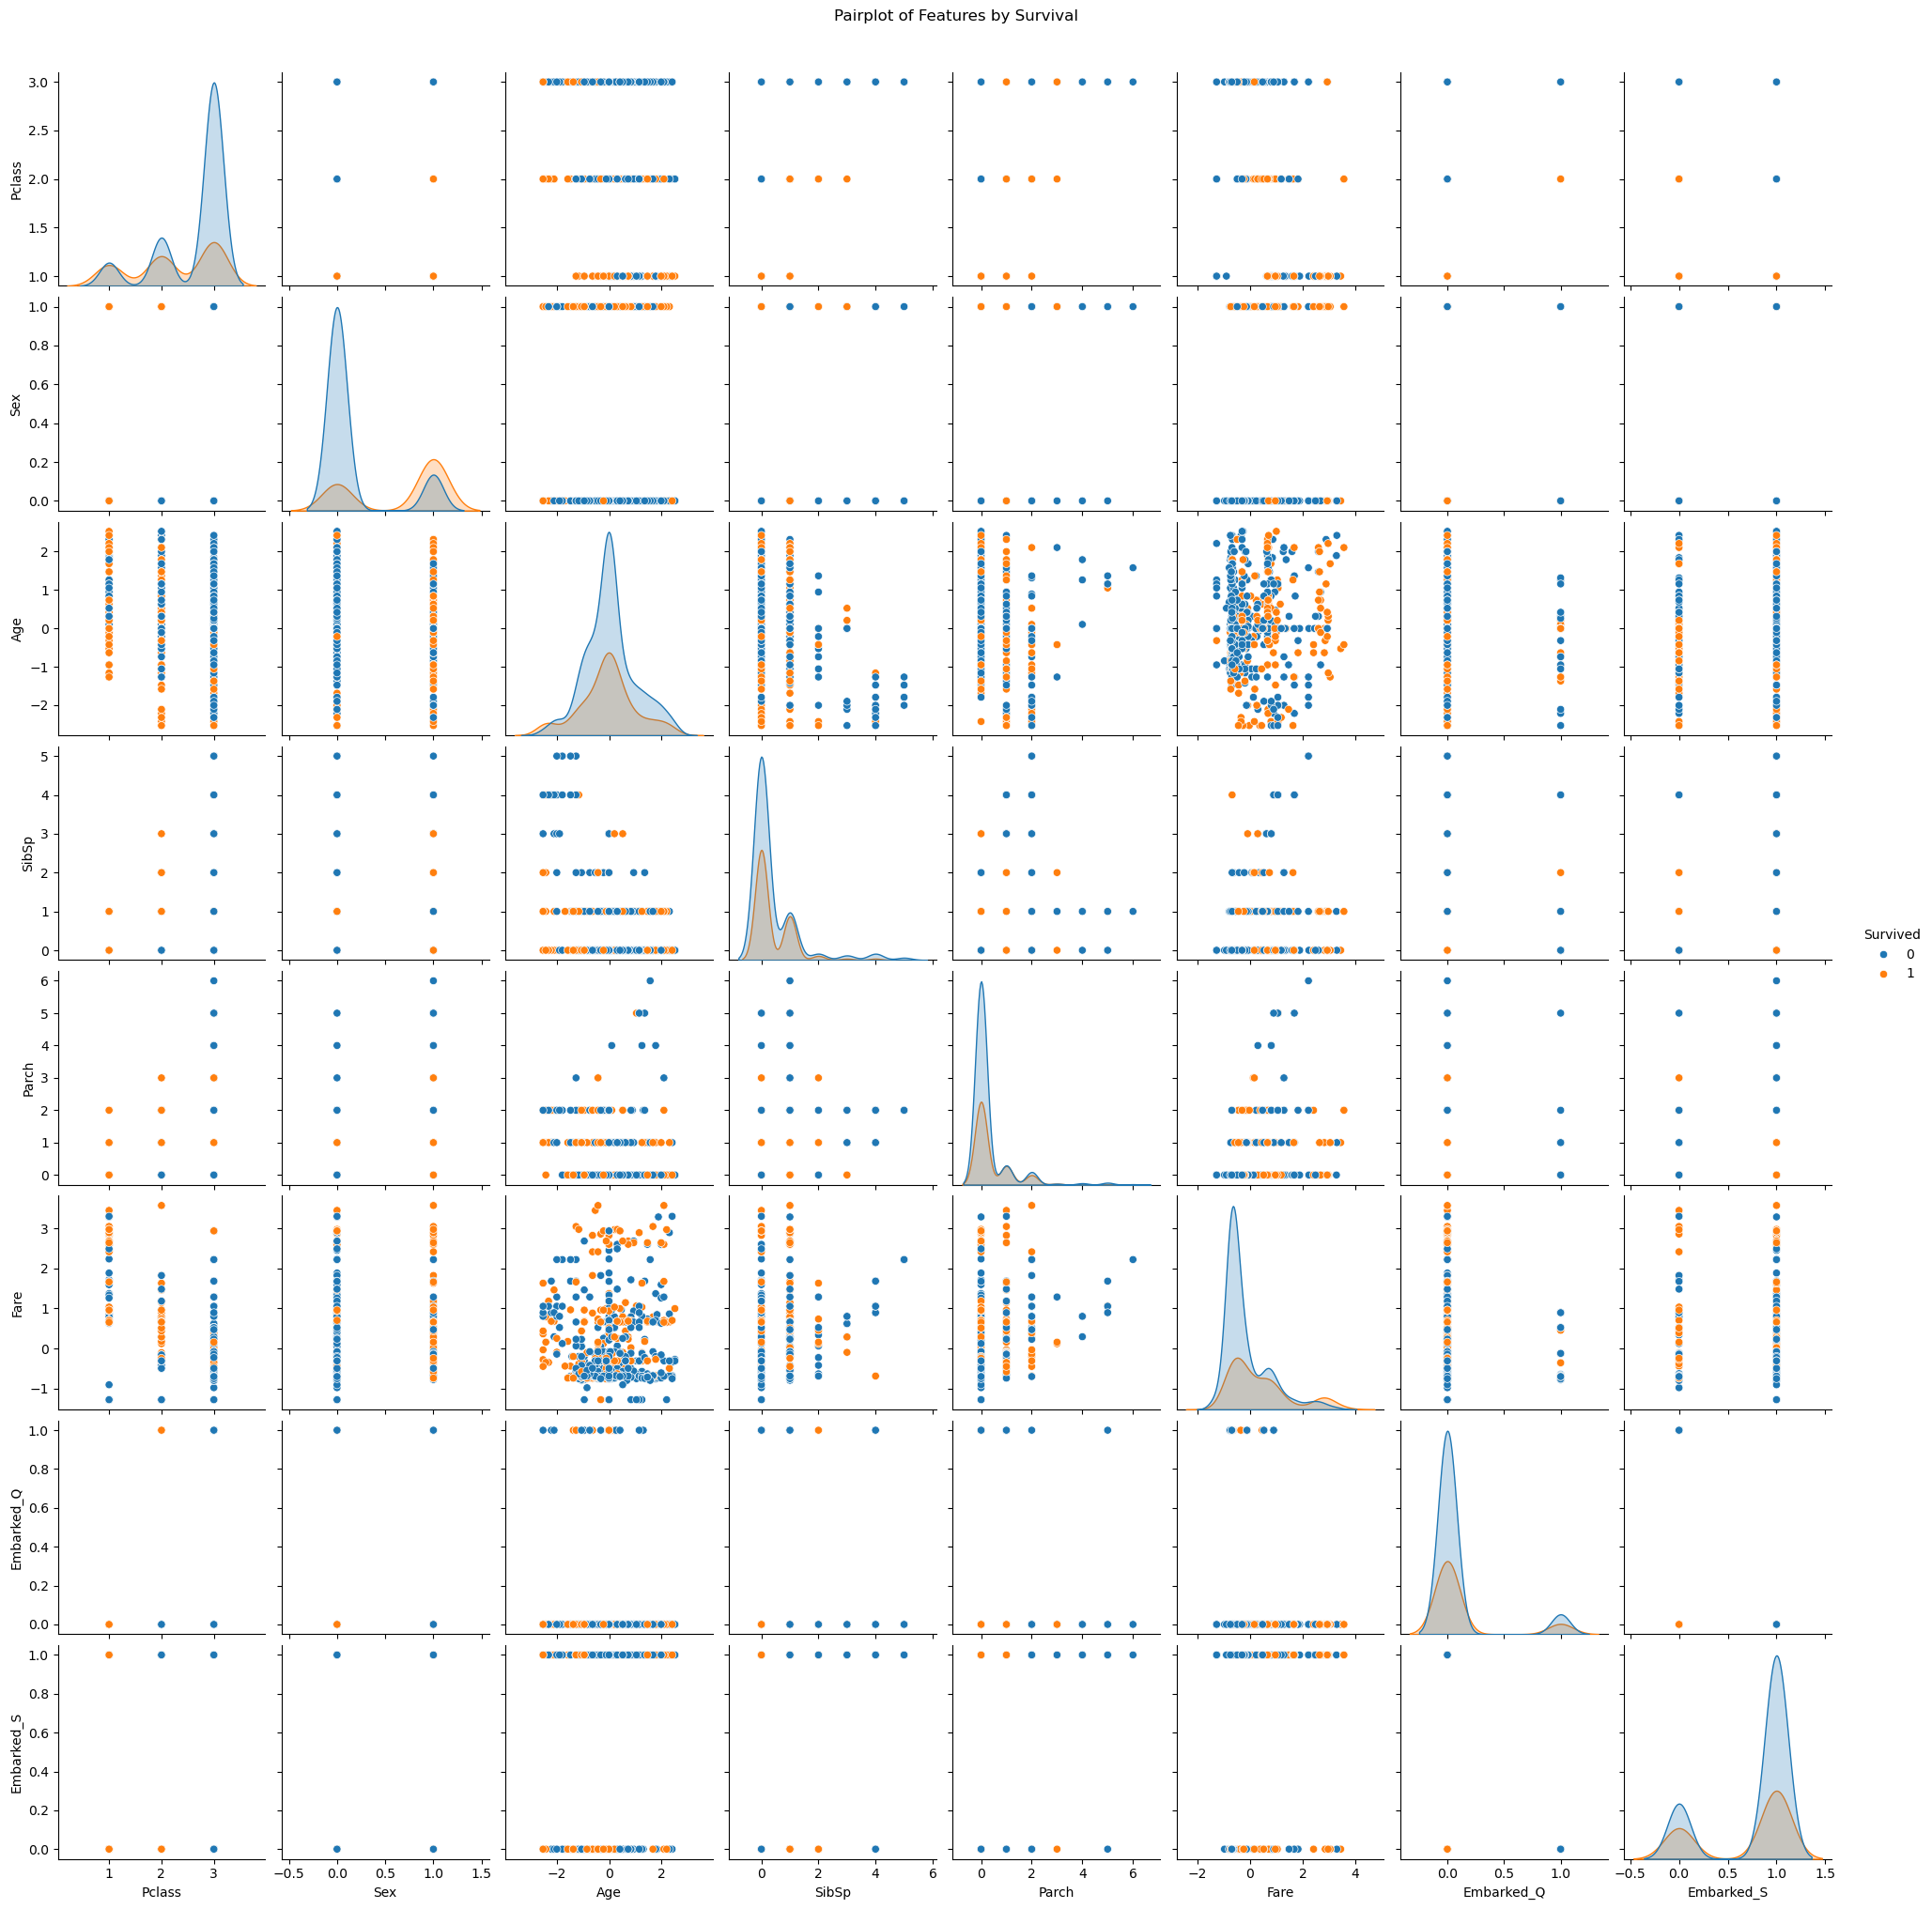

In [43]:
# Pairplot
sns.pairplot(df, hue='Survived', diag_kind='kde')
plt.suptitle("Pairplot of Features by Survival", y=1.02)
plt.show()

In [45]:
# Final cleaned data info
print("\nCleaned Data Preview:\n")
print(df.head())
print("\nFinal Dataset Info:\n")
print(df.info())


Cleaned Data Preview:

   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_Q  \
0         0       3    0 -0.637115      1      0 -0.737419       False   
2         1       3    1 -0.216039      0      0 -0.687065       False   
3         1       1    1  0.731381      1      0  2.682952       False   
4         0       3    0  0.731381      0      0 -0.677740       False   
5         0       3    0 -0.005501      0      0 -0.647281        True   

   Embarked_S  
0        True  
2        True  
3        True  
4        True  
5       False  

Final Dataset Info:

<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    708 non-null    int64  
 1   Pclass      708 non-null    int64  
 2   Sex         708 non-null    int64  
 3   Age         708 non-null    float64
 4   SibSp       708 non-null    int64  
 5   Parch       708 non-nu

# Overall, the dataset is now cleaner and ready for analysis or modeling. Here’s a brief summary:

# Size & Completeness:

## Contains 708 entries with no missing values, indicating thorough data cleaning.

# Data Types:

## Consists of numeric variables (int64, float64) and boolean indicators (Embarked_Q, Embarked_S).

# Features:

## Target variable: Survived (0 or 1).

## Passenger characteristics: Pclass, Sex, Age, SibSp, Parch, Fare.
## Embarkation points: Embarked_Q, Embarked_S (as boolean indicators).

# Distribution & Scaling:

## Numeric features are scaled to some degree (values could be standardized or normalized if needed).
## Outliers have been removed, leading to less skewed distributions.
# This dataset is now suitable for predictive modeling, such as predicting survival, or further exploratory data analysis.